# Structured data analysis example

This example will use subsets of a dataset of reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago in 2021. Source – Chicago data portal. URL https://data.cityofchicago.org/Public-Safety/Crimes-2021/dwme-t96c


Only a portion of the data entries in the dataset will be used to illustrate how to work with structured data using Pandas.


### Let us begin by bringing in the libraries we are interested in using for this exercise. We are using pandas, numpy and Matplotlib. We have have set up the plots to render in our notebook by using *%matplotlib inline*.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

#import requests
#from io import StringIO

## Now to bring the data into our notebook. Our data set is a .csv file stored on the class server in the datasets folder. You are given the file path. We will get the data from a data repository (inside SU) and bring it into the notebook.

## Read the data using *pd.read_csv* . This is a small version on the dataset we are bringing into our notebook.



In [2]:
#Defining location of dataset
filepath="/opt/datasets/ist652/Crimes/Crimes_small.csv"

crimes_small=pd.read_csv(filepath)

## Let's see the data from the CSV file looks like… we use the head function to get the top 5 rows.  There are 22 columns. This is a good point to go to the data source to see what these columns mean. See URL https://data.cityofchicago.org/Public-Safety/Crimes-2021/dwme-t96c

In [3]:
crimes_small.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12571973,JE482457,12/19/2021 7:23,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,...,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
1,12343475,JE202728,4/16/2021 20:45,056XX N RIDGE AVE,820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,...,48,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
2,12602803,JF125633,10/21/2021 11:00,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,...,8,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
3,12540388,JE444591,11/14/2021 6:00,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,...,6,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,12541139,JE445494,11/14/2021 4:00,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"


# DATE DATATYPE AND SETTING INDEXES

## To get more infomation on the dataframe we use the *.info()* function. Inspect the data types.

In [4]:
crimes_small.info() # about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9 non-null      int64  
 1   Case Number           9 non-null      object 
 2   Date                  9 non-null      object 
 3   Block                 9 non-null      object 
 4   IUCR                  9 non-null      object 
 5   Primary Type          9 non-null      object 
 6   Description           9 non-null      object 
 7   Location Description  9 non-null      object 
 8   Arrest                9 non-null      bool   
 9   Domestic              9 non-null      bool   
 10  Beat                  9 non-null      int64  
 11  District              9 non-null      int64  
 12  Ward                  9 non-null      int64  
 13  Community Area        9 non-null      int64  
 14  FBI Code              9 non-null      object 
 15  X Coordinate          8 non

## The immediate red flag is the "Date" column does not have the correct data type to make good use of it as a date column. It is an object type therefore a string, this is the default when parsing. If you recall Pandas has a datatype for dates and time.

## We need to parse that column so that it gets correctly formatted. (See this link for more tricks with dates: https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e)

## We use *parse_dates* which by default is month/day/year. You can customize the manner in which the date is parsed. Here we are specifying that the date/time column is located in the third column, hence *parse_dates=[2]*.

In [5]:
crimes_small=pd.read_csv(filepath,parse_dates=[2]) #getting the data into a pandas dataframe with the correct format for dates

In [6]:
crimes_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    9 non-null      int64         
 1   Case Number           9 non-null      object        
 2   Date                  9 non-null      datetime64[ns]
 3   Block                 9 non-null      object        
 4   IUCR                  9 non-null      object        
 5   Primary Type          9 non-null      object        
 6   Description           9 non-null      object        
 7   Location Description  9 non-null      object        
 8   Arrest                9 non-null      bool          
 9   Domestic              9 non-null      bool          
 10  Beat                  9 non-null      int64         
 11  District              9 non-null      int64         
 12  Ward                  9 non-null      int64         
 13  Community Area        9 

### The dataset in indexed automatically... 0, 1, 2. Let's index the dataset by date. It will make it easier to work with. To do this we use **set_index** and set the **inplace** parameter as True to make the change to our dataset. This parameter is set as False by default. You can add your own index series with *set_index*

In [7]:
crimes_small.set_index("Date",inplace=True) # setting datetime as the index

In [8]:
crimes_small.index

DatetimeIndex(['2021-12-19 07:23:00', '2021-04-16 20:45:00',
               '2021-10-21 11:00:00', '2021-11-14 06:00:00',
               '2021-11-14 04:00:00', '2021-11-14 09:00:00',
               '2021-11-14 14:00:00', '2021-11-14 00:00:00',
               '2021-01-09 15:59:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
crimes_small.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,12571973,JE482457,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,921,...,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
2021-04-16 20:45:00,12343475,JE202728,056XX N RIDGE AVE,820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,...,48,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
2021-10-21 11:00:00,12602803,JF125633,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,412,...,8,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2021-11-14 06:00:00,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,...,6,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
2021-11-14 04:00:00,12541139,JE445494,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,...,12,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"


### Confirming date is set as our index

In [15]:
crimes_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2021-12-19 07:23:00 to 2021-01-09 15:59:00
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9 non-null      int64  
 1   Case Number           9 non-null      object 
 2   Block                 9 non-null      object 
 3   IUCR                  9 non-null      object 
 4   Primary Type          9 non-null      object 
 5   Description           9 non-null      object 
 6   Location Description  9 non-null      object 
 7   Arrest                9 non-null      bool   
 8   Domestic              9 non-null      bool   
 9   Beat                  9 non-null      int64  
 10  District              9 non-null      int64  
 11  Ward                  9 non-null      int64  
 12  Community Area        9 non-null      int64  
 13  FBI Code              9 non-null      object 
 14  X Coordinate          8 non-null      f

### If I want to see the values for a specific date. I can use my index value.

In [17]:
crimes_small.sort_index().loc['2021-12-19']

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,12571973,JE482457,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,921,...,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"


### I can also use a date range

In [21]:
crimes_small.sort_index().loc['2021-10-19' : '2021-12-30']

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-21 11:00:00,12602803,JF125633,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,412,...,8,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2021-11-14 00:00:00,12541098,JE444580,072XX S HAMLIN AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,833,...,13,65,08B,1152286.0,1856407.0,2021,11/21/2021 15:48,41.761840,-87.717421,"(41.761840209, -87.717420956)"
2021-11-14 04:00:00,12541139,JE445494,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,...,12,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"
2021-11-14 06:00:00,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,...,6,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
2021-11-14 09:00:00,12540496,JE444717,070XX S INDIANA AVE,820,THEFT,$500 AND UNDER,APARTMENT,False,True,322,...,6,69,6,1178811.0,1858376.0,2021,11/21/2021 15:48,41.766681,-87.620144,"(41.766681066, -87.62014422)"
2021-11-14 14:00:00,12542477,JE447028,021XX N BINGHAM ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,False,1431,...,1,22,6,1158583.0,1913745.0,2021,11/21/2021 15:48,41.919056,-87.692774,"(41.919056144, -87.692774252)"
2021-12-19 07:23:00,12571973,JE482457,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,921,...,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"


### Now, let's get the larger dataset into our notebook

In [22]:
filepath="/opt/datasets/ist652/Crimes/Crimes_20k.csv"

### We can get the pandas dataframe correctly structured in one command (thanks to the work on the small version of the dataset). Let us parse the date and set date as a index. Here we are specifying with column to index using *index_col*

In [23]:
crimes=pd.read_csv(filepath,parse_dates=[2], index_col=[2])

In [24]:
crimes.tail()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-02 12:32:00,12259624,JE101261,046XX W VAN BUREN ST,4650,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER,STREET,True,False,1131,...,24.0,25,26,1145550.0,1897622.0,2021,1/16/2021 15:49,41.875070,-87.741068,"(41.875069995, -87.741068317)"
2021-01-06 12:18:00,12262739,JE104970,013XX S FAIRFIELD AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1023,...,28.0,29,15,1158247.0,1893603.0,2021,1/16/2021 15:49,41.863792,-87.694560,"(41.863791576, -87.694559683)"
2021-01-07 10:52:00,12263546,JE105815,036XX W POLK ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1133,...,24.0,27,15,1152328.0,1896125.0,2021,1/16/2021 15:49,41.870831,-87.716222,"(41.870831024, -87.716221583)"
2021-01-01 01:00:00,12259461,JE100546,076XX S RHODES AVE,460,BATTERY,SIMPLE,RESIDENCE,False,False,624,...,6.0,69,08B,1181227.0,1854479.0,2021,1/16/2021 15:49,41.755932,-87.611409,"(41.755931978, -87.611408601)"
2021-01-02 23:02:00,12260076,JE101741,075XX S COLES AVE,460,BATTERY,SIMPLE,APARTMENT,False,False,421,...,7.0,43,08B,1195976.0,1855570.0,2021,1/16/2021 15:49,41.758573,-87.557322,"(41.758573421, -87.557321761)"


In [25]:
crimes.index # Confirming our index column

DatetimeIndex(['2021-12-19 07:23:00', '2021-04-16 20:45:00',
               '2021-10-21 11:00:00', '2021-11-14 06:00:00',
               '2021-11-14 04:00:00', '2021-11-14 09:00:00',
               '2021-11-14 14:00:00', '2021-11-14 00:00:00',
               '2021-01-09 15:59:00', '2021-04-28 20:18:00',
               ...
               '2021-01-04 18:30:00', '2021-01-04 11:00:00',
               '2021-01-04 09:00:00', '2021-01-09 04:19:00',
               '2021-01-05 00:46:00', '2021-01-02 12:32:00',
               '2021-01-06 12:18:00', '2021-01-07 10:52:00',
               '2021-01-01 01:00:00', '2021-01-02 23:02:00'],
              dtype='datetime64[ns]', name='Date', length=20000, freq=None)

In [26]:
crimes.info(verbose=True) # setting verbose to true gives us detailed information.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2021-12-19 07:23:00 to 2021-01-02 23:02:00
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20000 non-null  int64  
 1   Case Number           20000 non-null  object 
 2   Block                 20000 non-null  object 
 3   IUCR                  20000 non-null  object 
 4   Primary Type          20000 non-null  object 
 5   Description           20000 non-null  object 
 6   Location Description  19936 non-null  object 
 7   Arrest                20000 non-null  bool   
 8   Domestic              20000 non-null  bool   
 9   Beat                  20000 non-null  int64  
 10  District              20000 non-null  int64  
 11  Ward                  19999 non-null  float64
 12  Community Area        20000 non-null  int64  
 13  FBI Code              20000 non-null  object 
 14  X Coordinate          19789 non-nul

# RESAMPLING

### Resampling is used to enhance your analysis. You can leverage if you have a datetime type index in your dataset. You can think of this as a sampling distribution. You can resample by time series frequecies  like day, week, month ... (upsampling). Let's resample the dataset by day for the categories of crimes(the series "Primary Type")

### (For more information on re-sampling, look at https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4 )

In [27]:
daily_crimes = crimes['Primary Type'].resample('D').count()  #resample, count crimes per day
daily_crimes.sort_index(inplace=True) # set your inplace as True

In [28]:
daily_crimes.tail()

Date
2021-12-24    0
2021-12-25    0
2021-12-26    1
2021-12-27    0
2021-12-28    1
Freq: D, Name: Primary Type, dtype: int64

<Axes: xlabel='Date'>

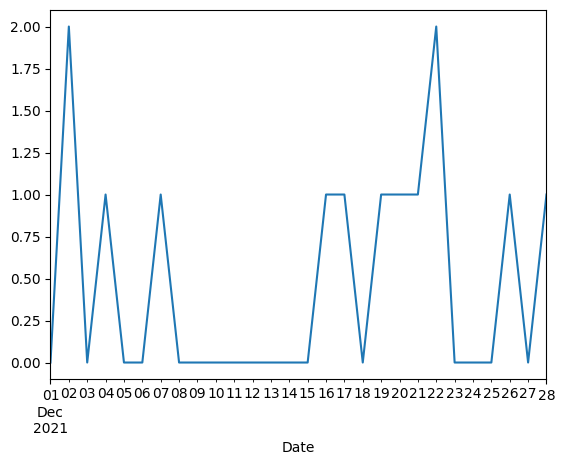

In [29]:
daily_crimesDec = daily_crimes['2021-12']
daily_crimesDec.plot()  # Let us narrow to the month of December and plot

<Axes: xlabel='Date'>

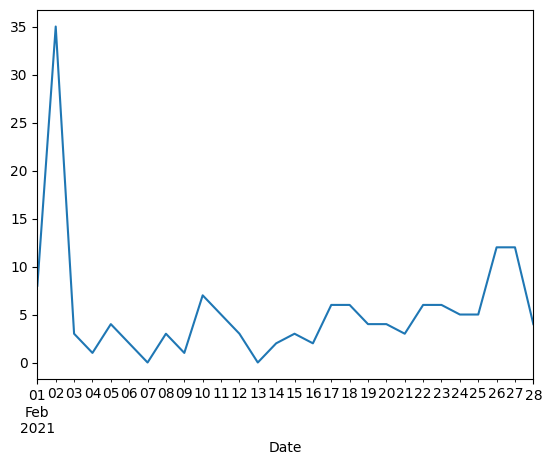

In [30]:
daily_crimesFeb = daily_crimes['2021-02']
daily_crimesFeb.plot()   # let us look at the month of Feb and plot

# PANDAS DATA STRUCTURES

### Let's explain them on the data we have…

### Series. Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). So, the variable `crime_types` is a series of strings designating types of crimes and labeled with the crime's time of occurrence.

In [31]:
crime_types = crimes['Primary Type']
crime_types

Date
2021-12-19 07:23:00              BATTERY
2021-04-16 20:45:00                THEFT
2021-10-21 11:00:00        OTHER OFFENSE
2021-11-14 06:00:00                THEFT
2021-11-14 04:00:00              BATTERY
                             ...        
2021-01-02 12:32:00        OTHER OFFENSE
2021-01-06 12:18:00    WEAPONS VIOLATION
2021-01-07 10:52:00    WEAPONS VIOLATION
2021-01-01 01:00:00              BATTERY
2021-01-02 23:02:00              BATTERY
Name: Primary Type, Length: 20000, dtype: object

### On the other hand, `daily_crimesDec` is a series with the number of crimes per day.

In [32]:
daily_crimesDec

Date
2021-12-01    0
2021-12-02    2
2021-12-03    0
2021-12-04    1
2021-12-05    0
2021-12-06    0
2021-12-07    1
2021-12-08    0
2021-12-09    0
2021-12-10    0
2021-12-11    0
2021-12-12    0
2021-12-13    0
2021-12-14    0
2021-12-15    0
2021-12-16    1
2021-12-17    1
2021-12-18    0
2021-12-19    1
2021-12-20    1
2021-12-21    1
2021-12-22    2
2021-12-23    0
2021-12-24    0
2021-12-25    0
2021-12-26    1
2021-12-27    0
2021-12-28    1
Freq: D, Name: Primary Type, dtype: int64

### `crime_type` has an index which is a NumPy array. You will recall we set out date as our index

In [33]:
crime_types.index

DatetimeIndex(['2021-12-19 07:23:00', '2021-04-16 20:45:00',
               '2021-10-21 11:00:00', '2021-11-14 06:00:00',
               '2021-11-14 04:00:00', '2021-11-14 09:00:00',
               '2021-11-14 14:00:00', '2021-11-14 00:00:00',
               '2021-01-09 15:59:00', '2021-04-28 20:18:00',
               ...
               '2021-01-04 18:30:00', '2021-01-04 11:00:00',
               '2021-01-04 09:00:00', '2021-01-09 04:19:00',
               '2021-01-05 00:46:00', '2021-01-02 12:32:00',
               '2021-01-06 12:18:00', '2021-01-07 10:52:00',
               '2021-01-01 01:00:00', '2021-01-02 23:02:00'],
              dtype='datetime64[ns]', name='Date', length=20000, freq=None)

### … and array of values too

In [34]:
crime_types.values

array(['BATTERY', 'THEFT', 'OTHER OFFENSE', ..., 'WEAPONS VIOLATION',
       'BATTERY', 'BATTERY'], dtype=object)

### Remember, **data alignment is intrinsic**. If we sort the index, values are still correctly matched to corresponding dates.

In [19]:
crime_types.sort_index(ascending=True).head(10)

Date
2021-01-01 00:00:00                         THEFT
2021-01-01 00:00:00                       ASSAULT
2021-01-01 00:00:00                       BATTERY
2021-01-01 00:00:00                 OTHER OFFENSE
2021-01-01 00:00:00            DECEPTIVE PRACTICE
2021-01-01 00:00:00    OFFENSE INVOLVING CHILDREN
2021-01-01 00:00:00               CRIMINAL DAMAGE
2021-01-01 00:00:00            DECEPTIVE PRACTICE
2021-01-01 00:00:00               CRIMINAL DAMAGE
2021-01-01 00:01:00                       BATTERY
Name: Primary Type, dtype: object

In [20]:
crime_types.sort_index(ascending=False).head()

Date
2021-12-28 00:00:00               ROBBERY
2021-12-26 12:00:00    DECEPTIVE PRACTICE
2021-12-22 09:00:00    DECEPTIVE PRACTICE
2021-12-22 00:01:00    DECEPTIVE PRACTICE
2021-12-21 18:30:00               BATTERY
Name: Primary Type, dtype: object

### The other date structure...

### DataFrame

A table-like data structure. Essentially the whole crimes object is a DataFrame.

In [35]:
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,12571973,JE482457,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,921,...,15.0,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
2021-04-16 20:45:00,12343475,JE202728,056XX N RIDGE AVE,820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,...,48.0,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
2021-10-21 11:00:00,12602803,JF125633,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,412,...,8.0,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2021-11-14 06:00:00,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,...,6.0,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
2021-11-14 04:00:00,12541139,JE445494,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,...,12.0,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"


It also has an index of rows:

In [22]:
crimes.index

DatetimeIndex(['2021-12-19 07:23:00', '2021-04-16 20:45:00',
               '2021-10-21 11:00:00', '2021-11-14 06:00:00',
               '2021-11-14 04:00:00', '2021-11-14 09:00:00',
               '2021-11-14 14:00:00', '2021-11-14 00:00:00',
               '2021-01-09 15:59:00', '2021-04-28 20:18:00',
               ...
               '2021-01-04 18:30:00', '2021-01-04 11:00:00',
               '2021-01-04 09:00:00', '2021-01-09 04:19:00',
               '2021-01-05 00:46:00', '2021-01-02 12:32:00',
               '2021-01-06 12:18:00', '2021-01-07 10:52:00',
               '2021-01-01 01:00:00', '2021-01-02 23:02:00'],
              dtype='datetime64[ns]', name='Date', length=20000, freq=None)

… but also an index of columns

In [23]:
crimes.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

## TANGENT : CREATING PANDA OBJECTS

### So far we've only been creating Pandas objects from CSV files using the `pd.read_csv` function, but we can also create new ones from other Python data structures (which will come in handy later when we get to scraping data from the web).

### Let us create a series with a Python object

In [24]:
s = pd.Series({'A': 15, 'B': 8, 'C': 6, 'D': 2, 'E': 10})
s

A    15
B     8
C     6
D     2
E    10
dtype: int64

In [25]:
df = pd.DataFrame({'age': s, 'test': {'A': 2.6, 'B': 69.27, 'C': 14.2, 'D': 8.0, 'E': 5.93}})
df  # we set age to the series s

,age,test
A,15,2.60
B,8,69.27
C,6,14.20
D,2,8.00
E,10,5.93


## SELECTING VALUES

###  Now let's give a very quick overview of the many ways of data selection in Pandas.

### Selecting by label ... Label-based using `.loc`

### By single value – this actually returns a series when we select a single column/row in a DataFrame

In [26]:
df.loc['A'] #selecting from the dataframe

age     15.0
test     2.6
Name: A, dtype: float64

#### If we're selecting in a Series, we get back a scalar. Note the difference.

In [27]:
s.loc['A'] #seleting from the series

15

Or we can select by passing a list of labels to select (which keeps the same dimensionality)

In [28]:
# using lists
df.loc[['A', 'B']]

,age,test
A,15,2.60
B,8,69.27


In [29]:
s.loc[['A', 'B']]

A    15
B     8
dtype: int64

We can also select columns

In [ ]:
df.loc[:, ['age']] # o select all rows (:) but only the age column from the DataFrame df

,age
A,15
B,8
C,6
D,2
E,10


… or both by row and column

In [30]:
df.loc[['A','B'], ['age']]

,age
A,15
B,8


Shorthand we've been using already for selecting a whole column

In [32]:
df['age']

A    15
B     8
C     6
D     2
E    10
Name: age, dtype: int64

#### If the column name doesn't contain spaces or doesn't clash with any object method names we can also use the following syntax

In [33]:
df.age

A    15
B     8
C     6
D     2
E    10
Name: age, dtype: int64

## Index-based using `.iloc`

### Here we select using index numbers

In [34]:
df.iloc[[0, 2, 3]]

,age,test
A,15,2.6
C,6,14.2
D,2,8.0


In [36]:
crimes.iloc[:10, [5]]  # give me the first 10 rows and the 5th column

,Description
Date,
2021-12-19 07:23:00,SIMPLE
2021-04-16 20:45:00,$500 AND UNDER
2021-10-21 11:00:00,EAVESDROPPING
2021-11-14 06:00:00,ATTEMPT THEFT
2021-11-14 04:00:00,DOMESTIC BATTERY SIMPLE
2021-11-14 09:00:00,$500 AND UNDER
2021-11-14 14:00:00,$500 AND UNDER
2021-11-14 00:00:00,DOMESTIC BATTERY SIMPLE
2021-01-09 15:59:00,BY FIRE


### Using iloc for slicing

#### Selecting by using ranges. Back to our small dataframe.

In [36]:
df.iloc[2:5] # give me rows 2 to 4

,age,test
C,6,14.20
D,2,8.00
E,10,5.93


Or for short

In [37]:
df[2:5]

,age,test
C,6,14.20
D,2,8.00
E,10,5.93


### An awesome feature – slicing is datetime-aware

In [38]:
daily_crimesDec['2021-12-20':].head(10) # give me crimes from Dec 20 to the end

Date
2021-12-20    1
2021-12-21    1
2021-12-22    2
2021-12-23    0
2021-12-24    0
2021-12-25    0
2021-12-26    1
2021-12-27    0
2021-12-28    1
Freq: D, Name: Primary Type, dtype: int64

In [39]:
daily_crimesDec['2021-12-01':] # crimes for the month of December

Date
2021-12-01    0
2021-12-02    2
2021-12-03    0
2021-12-04    1
2021-12-05    0
2021-12-06    0
2021-12-07    1
2021-12-08    0
2021-12-09    0
2021-12-10    0
2021-12-11    0
2021-12-12    0
2021-12-13    0
2021-12-14    0
2021-12-15    0
2021-12-16    1
2021-12-17    1
2021-12-18    0
2021-12-19    1
2021-12-20    1
2021-12-21    1
2021-12-22    2
2021-12-23    0
2021-12-24    0
2021-12-25    0
2021-12-26    1
2021-12-27    0
2021-12-28    1
Freq: D, Name: Primary Type, dtype: int64

# BOOLEAN INDEXING

### Filter based on boolean expressions. Can be used on any expression that returns boolean values…

In [40]:
daily_crimesDec > 1 # Here we are trying to determine the crimes for

Date
2021-12-01    False
2021-12-02     True
2021-12-03    False
2021-12-04    False
2021-12-05    False
2021-12-06    False
2021-12-07    False
2021-12-08    False
2021-12-09    False
2021-12-10    False
2021-12-11    False
2021-12-12    False
2021-12-13    False
2021-12-14    False
2021-12-15    False
2021-12-16    False
2021-12-17    False
2021-12-18    False
2021-12-19    False
2021-12-20    False
2021-12-21    False
2021-12-22     True
2021-12-23    False
2021-12-24    False
2021-12-25    False
2021-12-26    False
2021-12-27    False
2021-12-28    False
Freq: D, Name: Primary Type, dtype: bool

… can also be used to index values where the boolean expression yields true.

In [ ]:
daily_crimesDec[daily_crimesDec > 1].count() # days in Dec when crimes was > 1

2

# RESHAPING

### The input data format is often not the most useful for actually processing and visualising the information we're most interested in. Pandas' offers many useful methods for reshaping the data:

### - `pivot_table` – select exactly the rows/columns you want
### - `stack` / `unstack` – append to the index, adding more levels of a hierarchical Multindex
### - `groupby` – similar to the SQL `Group By` command
### - `resample` – like `groupby`, but for creating groups from time intervals (hours, days, weeks, etc.)

### There are lots of operations you can express using these commands – see more documentation on them [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html). See https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html


In [37]:
crimes_small.head() #using our small data set

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,12571973,JE482457,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,921,...,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
2021-04-16 20:45:00,12343475,JE202728,056XX N RIDGE AVE,820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,...,48,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
2021-10-21 11:00:00,12602803,JF125633,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,412,...,8,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2021-11-14 06:00:00,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,...,6,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
2021-11-14 04:00:00,12541139,JE445494,034XX W 38TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,...,12,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"


### Adding another index

In [38]:
crimes_small_mi = crimes_small.set_index(['Primary Type'], append=True)  #adds another index
crimes_small_mi  #the dataframe has two indices

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,Primary Type,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,BATTERY,12571973,JE482457,042XX S MOZART ST,460,SIMPLE,SIDEWALK,True,True,921,9,15,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
2021-04-16 20:45:00,THEFT,12343475,JE202728,056XX N RIDGE AVE,820,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,20,48,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN
2021-10-21 11:00:00,OTHER OFFENSE,12602803,JF125633,083XX S STONY ISLAND AVE,500E,EAVESDROPPING,OTHER (SPECIFY),False,False,412,4,8,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)"
2021-11-14 06:00:00,THEFT,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,6,6,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)"
2021-11-14 04:00:00,BATTERY,12541139,JE445494,034XX W 38TH ST,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,9,12,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)"
2021-11-14 09:00:00,THEFT,12540496,JE444717,070XX S INDIANA AVE,820,$500 AND UNDER,APARTMENT,False,True,322,3,6,69,6,1178811.0,1858376.0,2021,11/21/2021 15:48,41.766681,-87.620144,"(41.766681066, -87.62014422)"
2021-11-14 14:00:00,THEFT,12542477,JE447028,021XX N BINGHAM ST,820,$500 AND UNDER,RESIDENCE,False,False,1431,14,1,22,6,1158583.0,1913745.0,2021,11/21/2021 15:48,41.919056,-87.692774,"(41.919056144, -87.692774252)"
2021-11-14 00:00:00,BATTERY,12541098,JE444580,072XX S HAMLIN AVE,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,833,8,13,65,08B,1152286.0,1856407.0,2021,11/21/2021 15:48,41.761840,-87.717421,"(41.761840209, -87.717420956)"
2021-01-09 15:59:00,ARSON,12265790,JE108071,017XX W WINNEMAC AVE,1020,BY FIRE,VEHICLE NON-COMMERCIAL,True,True,2032,20,40,3,9,1164039.0,1933591.0,2021,8/12/2021 16:59,41.973401,-87.672166,"(41.973401006, -87.672165851)"


In [39]:
#Preparation for crime counting analysis
crimes_small_mi.ID   # Access the ID column from the crimes_small_mi DataFrame
#crimes_small_mi['ID'] Another syntax

Date                 Primary Type 
2021-12-19 07:23:00  BATTERY          12571973
2021-04-16 20:45:00  THEFT            12343475
2021-10-21 11:00:00  OTHER OFFENSE    12602803
2021-11-14 06:00:00  THEFT            12540388
2021-11-14 04:00:00  BATTERY          12541139
2021-11-14 09:00:00  THEFT            12540496
2021-11-14 14:00:00  THEFT            12542477
2021-11-14 00:00:00  BATTERY          12541098
2021-01-09 15:59:00  ARSON            12265790
Name: ID, dtype: int64

### Similar to when we use a pivot table we use unstack to create new columns. To do this we need to have a multiindex. See https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php

###  You can think of this as transposing


In [40]:
# pivot or "unstack" a multi-indexed DataFrame by moving one of the levels of the index (in this case, level=1) into the columns

crimes_small_mi.ID.unstack(level= 1)  # primary type and transposed to create new columns.We set the level to 1... the second index

Primary Type,ARSON,BATTERY,OTHER OFFENSE,THEFT
Date,,,,
2021-01-09 15:59:00,12265790.0,NaN,NaN,NaN
2021-04-16 20:45:00,NaN,NaN,NaN,12343475.0
2021-10-21 11:00:00,NaN,NaN,12602803.0,NaN
2021-11-14 00:00:00,NaN,12541098.0,NaN,NaN
2021-11-14 04:00:00,NaN,12541139.0,NaN,NaN
2021-11-14 06:00:00,NaN,NaN,NaN,12540388.0
2021-11-14 09:00:00,NaN,NaN,NaN,12540496.0
2021-11-14 14:00:00,NaN,NaN,NaN,12542477.0
2021-12-19 07:23:00,NaN,12571973.0,NaN,NaN


In [41]:
crimes_small_mi.ID.unstack(level=1).resample('h').count()

Primary Type,ARSON,BATTERY,OTHER OFFENSE,THEFT
Date,,,,
2021-01-09 15:00:00,1,0,0,0
2021-01-09 16:00:00,0,0,0,0
2021-01-09 17:00:00,0,0,0,0
2021-01-09 18:00:00,0,0,0,0
2021-01-09 19:00:00,0,0,0,0
...,...,...,...,...
2021-12-19 03:00:00,0,0,0,0
2021-12-19 04:00:00,0,0,0,0
2021-12-19 05:00:00,0,0,0,0


### Now let's do this for the big dataset

In [42]:
crimes_mi = crimes.set_index(['Primary Type'], append=True) # setting the second index

### Bummer turns out the same command we used before would yield a `ValueError: Index contains duplicate entries, cannot reshape`

In [43]:
crimes_mi.ID.unstack(level=1).resample('h').count().plot()

ValueError: Index contains duplicate entries, cannot reshape

#### How to deal with duplicates – the same crime noted under the same minute. Let's see if we can sum those up first…

#### We use numpy to create a new array of ones.

In [58]:
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int) # create and array of ones call occurences
crimes_mi

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,ocurrences
Date,Primary Type,,,,,,,,,,,,,,,,,,,,,
2021-12-19 07:23:00,BATTERY,12571973,JE482457,042XX S MOZART ST,460,SIMPLE,SIDEWALK,True,True,921,9,...,58,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)",1
2021-04-16 20:45:00,THEFT,12343475,JE202728,056XX N RIDGE AVE,820,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,20,...,77,6,NaN,NaN,2021,4/23/2021 16:51,NaN,NaN,NaN,1
2021-10-21 11:00:00,OTHER OFFENSE,12602803,JF125633,083XX S STONY ISLAND AVE,500E,EAVESDROPPING,OTHER (SPECIFY),False,False,412,4,...,45,26,1188260.0,1849805.0,2021,2/27/2022 15:46,41.742941,-87.585783,"(41.74294124, -87.585783412)",1
2021-11-14 06:00:00,THEFT,12540388,JE444591,086XX S COTTAGE GROVE AVE,850,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,6,...,44,6,1183071.0,1847869.0,2021,11/21/2021 15:48,41.737751,-87.604856,"(41.737750767, -87.604855911)",1
2021-11-14 04:00:00,BATTERY,12541139,JE445494,034XX W 38TH ST,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,9,...,58,08B,1154073.0,1879187.0,2021,11/21/2021 15:48,41.824317,-87.710266,"(41.824316537, -87.710266215)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-02 12:32:00,OTHER OFFENSE,12259624,JE101261,046XX W VAN BUREN ST,4650,SEX OFFENDER - FAIL TO REGISTER,STREET,True,False,1131,11,...,25,26,1145550.0,1897622.0,2021,1/16/2021 15:49,41.875070,-87.741068,"(41.875069995, -87.741068317)",1
2021-01-06 12:18:00,WEAPONS VIOLATION,12262739,JE104970,013XX S FAIRFIELD AVE,143A,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1023,10,...,29,15,1158247.0,1893603.0,2021,1/16/2021 15:49,41.863792,-87.694560,"(41.863791576, -87.694559683)",1
2021-01-07 10:52:00,WEAPONS VIOLATION,12263546,JE105815,036XX W POLK ST,143A,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1133,11,...,27,15,1152328.0,1896125.0,2021,1/16/2021 15:49,41.870831,-87.716222,"(41.870831024, -87.716221583)",1


#### Add a new column ocurrences to the DataFrame crimes_mi, where every value in this column is set to 1. This is done using numpy to create an array of ones with the same length as the number of rows in crimes_mi. We group the ocurrences column by the first two levels of its index (levels 0 and 1), and then sum the occurrences for each group. Useful when you have multiIndex

#### This approach is often used when you want to aggregate counts later, e.g., for summing occurrences across different groups.

In [60]:
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int) # np.ones() returns a new array
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum() #group by the times in the index (level 0) and
                                                                #also use the columns (level 1)
crimes_grouped

Date                 Primary Type              
2021-01-01 00:00:00  ASSAULT                       1
                     BATTERY                       1
                     CRIMINAL DAMAGE               2
                     DECEPTIVE PRACTICE            2
                     OFFENSE INVOLVING CHILDREN    1
                                                  ..
2021-12-21 18:30:00  BATTERY                       1
2021-12-22 00:01:00  DECEPTIVE PRACTICE            1
2021-12-22 09:00:00  DECEPTIVE PRACTICE            1
2021-12-26 12:00:00  DECEPTIVE PRACTICE            1
2021-12-28 00:00:00  ROBBERY                       1
Name: ocurrences, Length: 17134, dtype: int64

## Now that the duplicates are addressed we can transpose the categories from the series 'Primary Type' into columns. So we *unstack at level =1* . This method transforms the second level of the index (level 1) of crimes_grouped into columns. After unstacking, each unique value from level 1 becomes a separate column. We resample by hour. Any values that are na we interpolate with 0 and make those integers

In [62]:
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,1,9,0,0,9,0,0,2,0,...,0,1,4,0,0,0,0,0,1,6
2021-01-01 01:00:00,0,0,10,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,2
2021-01-01 02:00:00,0,0,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 03:00:00,0,0,7,1,0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2021-01-01 04:00:00,0,1,6,0,0,2,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [74]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']]


Primary Type,THEFT,HOMICIDE,ASSAULT
Date,,,
2021-01-01 00:00:00,1,0,1
2021-01-01 01:00:00,0,0,0
2021-01-01 02:00:00,0,0,0
2021-01-01 03:00:00,1,0,0
2021-01-01 04:00:00,0,0,1
...,...,...,...
2021-12-27 20:00:00,0,0,0
2021-12-27 21:00:00,0,0,0
2021-12-27 22:00:00,0,0,0


### Let us select by label resample by day and find the total of these crimes categories.

In [92]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']].resample('D').sum()

Primary Type,THEFT,HOMICIDE,ASSAULT
Date,,,
2021-01-01,11,0,13
2021-01-02,19,0,12
2021-01-03,22,1,8
2021-01-04,32,0,17
2021-01-05,29,0,14
...,...,...,...
2021-12-24,0,0,0
2021-12-25,0,0,0
2021-12-26,0,0,0


In [93]:
daily_crimes = crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']].resample('D').sum() # let us look at some specific crimes by a day
selected_crimes_nov_19 = daily_crimes.loc['2021-11-19']
selected_crimes_nov_19

Primary Type
THEFT       47
HOMICIDE     0
ASSAULT     25
Name: 2021-11-19 00:00:00, dtype: int64

<Axes: xlabel='Date'>

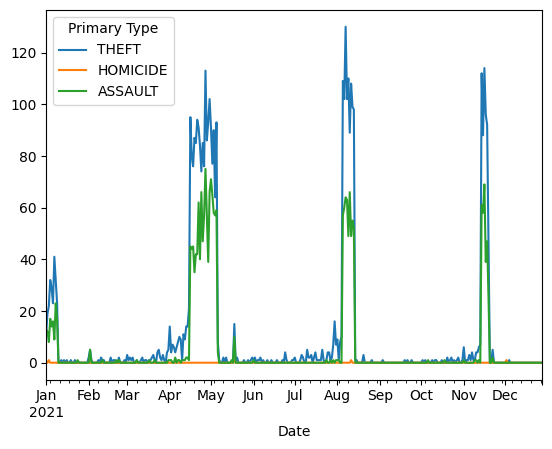

In [78]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']].resample('D').sum().plot() # let us plot this

# USING INTERACT

## Create an interactive widget

### Just a taste – see [the docs](https://ipywidgets.readthedocs.io/en/latest/index.html) for more options.

In [80]:
from ipywidgets import interact

In [81]:
@interact(crime_type = crimes_by_type.columns) # dropdown
def plot_chart(crime_type='THEFT'): # theft is the default
    crimes_by_type.loc[:, crime_type]['2021'].resample('D').sum().plot(title=crime_type)

interactive(children=(Dropdown(description='crime_type', index=26, options=('ARSON', 'ASSAULT', 'BATTERY', 'BU…

In [82]:
@interact(crime_type = crimes_by_type.columns) # dropdown save to a variable crime_type
def plot_chart(crime_type): # Sort alphabetically
    crimes_by_type.loc[:, crime_type]['2021'].resample('D').sum().plot(title=crime_type)

interactive(children=(Dropdown(description='crime_type', options=('ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', '…